In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/733/final_data.csv'
data = pd.read_csv(file_path)

In [5]:

# Columns of interest
selected_columns = [
    'TYPEHUQ', 'WALLTYPE', 'YEARMADE',
    'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME',
    'EMPLOYHH', 'NHSLDMEM', 'MONEYPY', 'LRGSTATE'
]

# Function to plot average KWH for each unique value in a column
def plot_avg_kwh_by_column(data, column):
    # Grouping the data by the column and calculating the mean KWH
    avg_kwh = data.groupby(column)['KWH'].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='KWH', data=avg_kwh)
    plt.title(f'Average KWH by {column}')
    plt.ylabel('Average KWH')
    plt.xticks(rotation=45)
    plt.show()

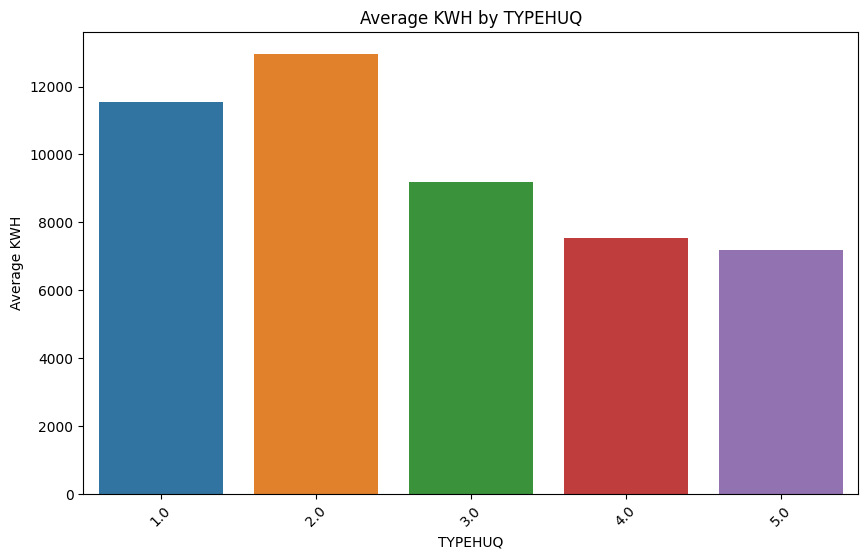

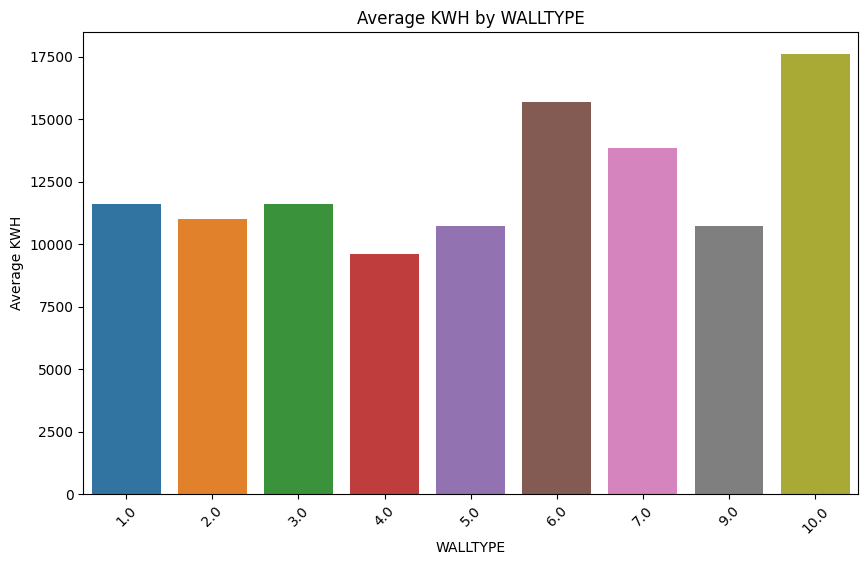

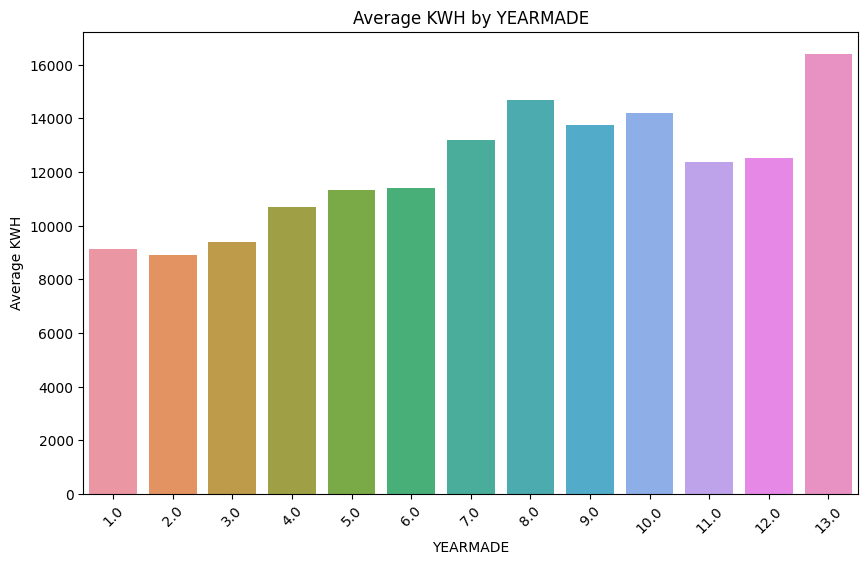

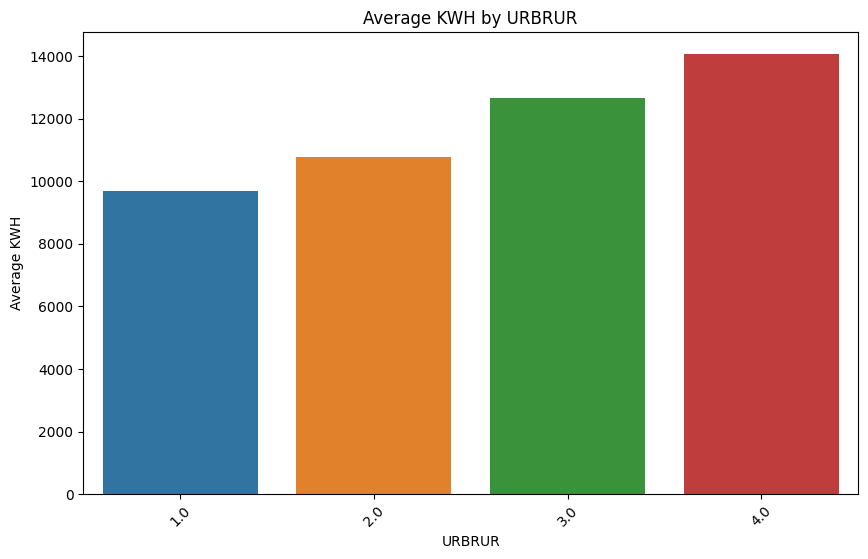

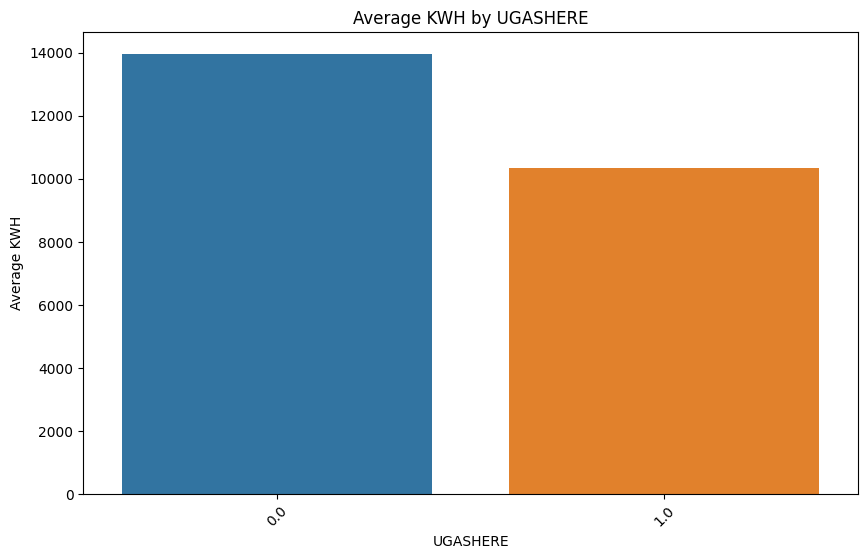

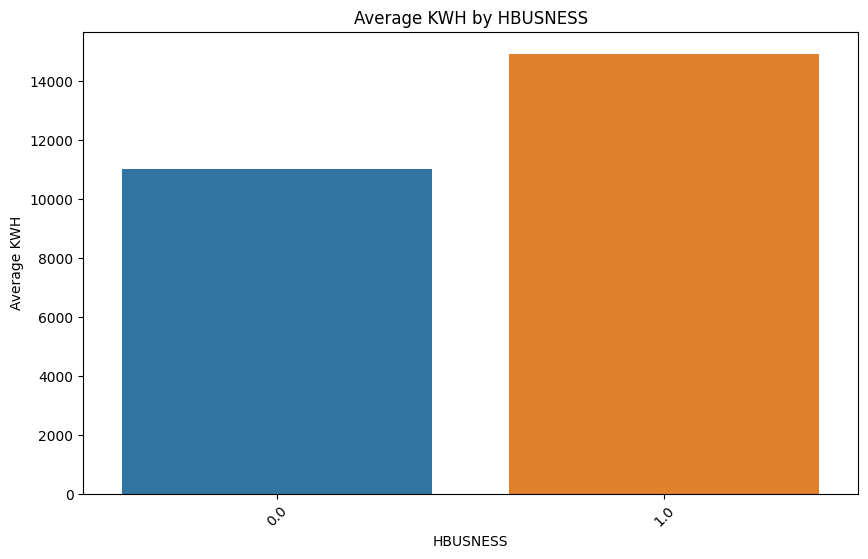

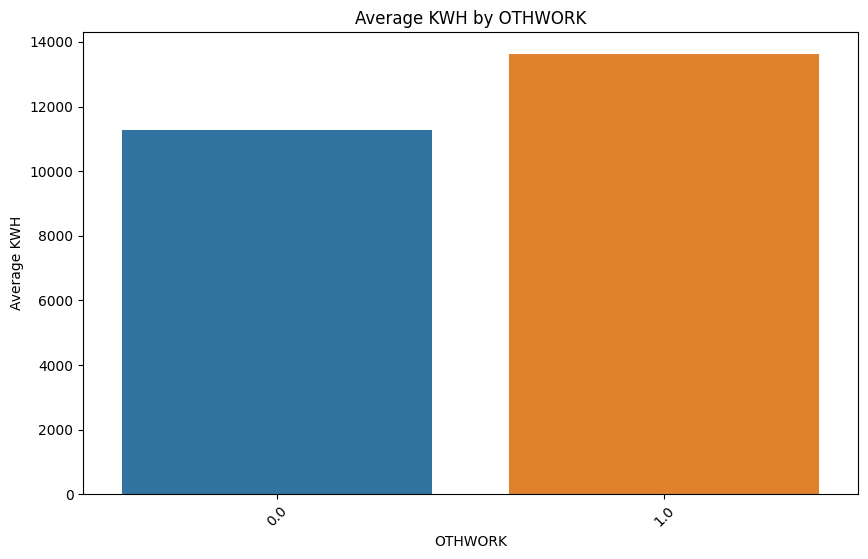

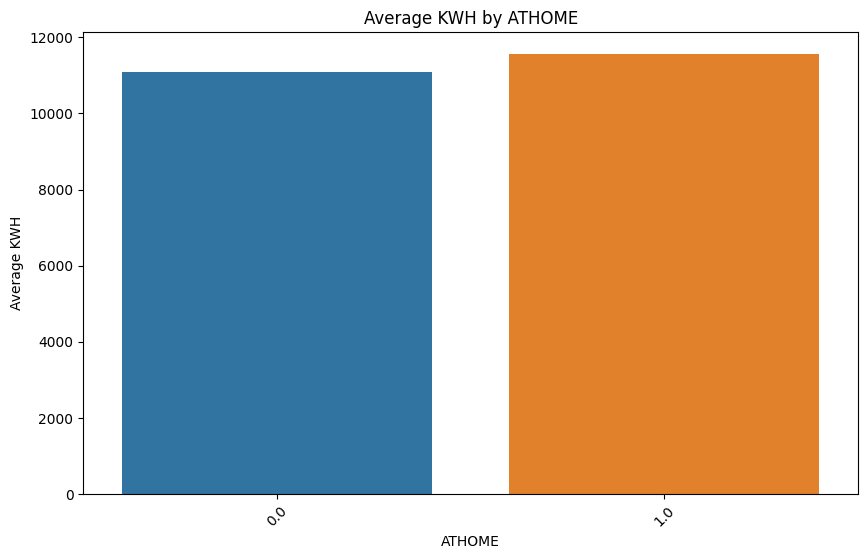

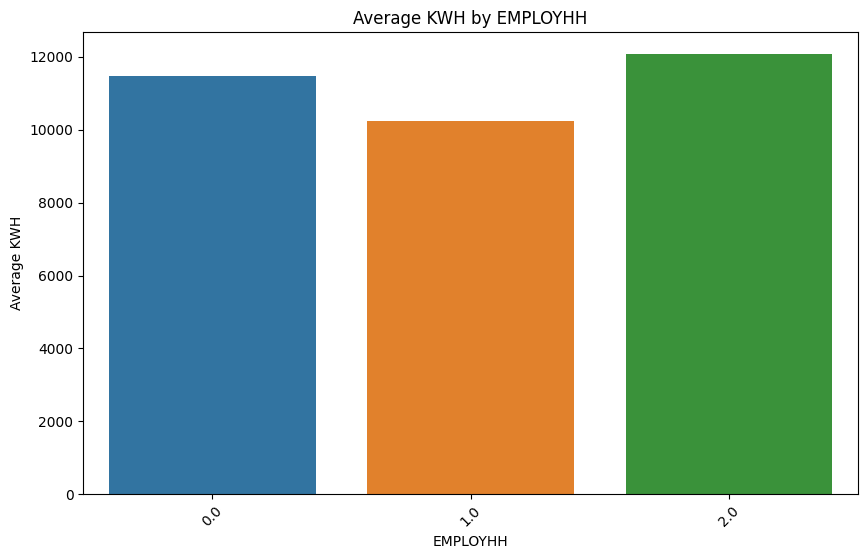

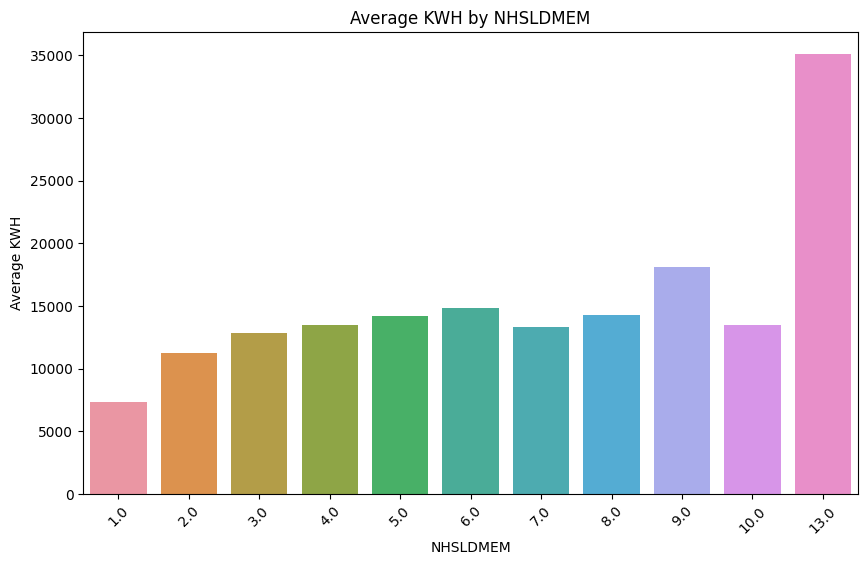

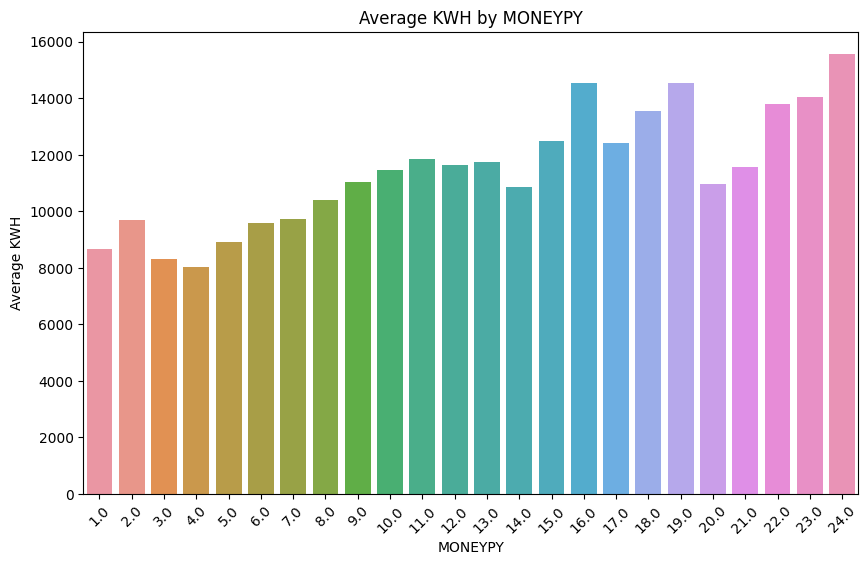

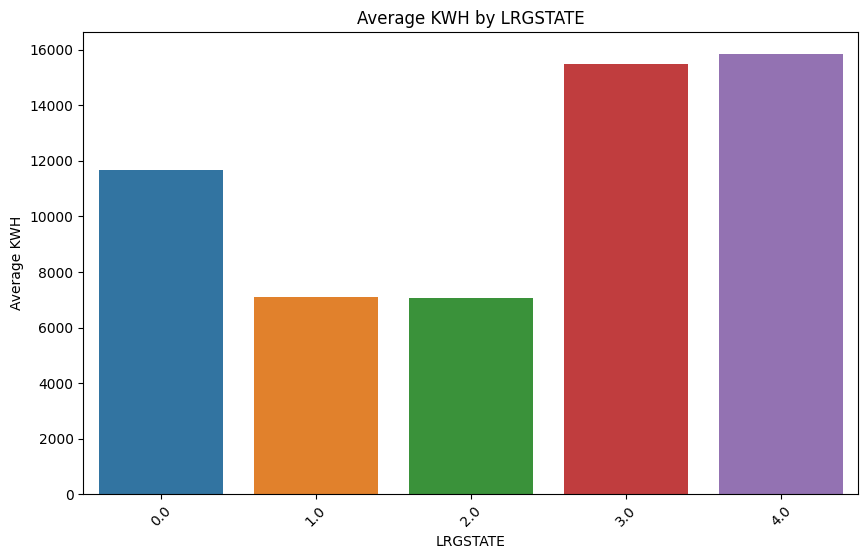

In [6]:
# Plotting for each column
for column in selected_columns:
    plot_avg_kwh_by_column(data, column)


In [ ]:

# Check for missing values
print(data.isnull().sum())

# Split the data into features and target
X = data[['TOTSQFT', 'TOTHSQFT', 'TYPEHUQ', 'WALLTYPE', 'YEARMADE', 'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME', 'EMPLOYHH', 'NHSLDMEM', 'MONEYPY', 'LRGSTATE', 'HD65', 'CD65']]
Y = data['KWH']

# Output the first few rows to check
print(X.head())
print(Y.head())


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'X' is your features dataframe from the previous step

# Update categorical and numerical columns lists
categorical_columns = ['TYPEHUQ', 'WALLTYPE', 'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME', 'EMPLOYHH', 'MONEYPY', 'LRGSTATE', 'YEARMADE']
numerical_columns = ['TOTSQFT', 'TOTHSQFT', 'NHSLDMEM', 'HD65', 'CD65']

# Separate the data into categorical and numerical dataframes
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

# Initialize OneHotEncoder and StandardScaler
encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

# Apply OneHotEncoder to the categorical data
X_categorical_transformed = encoder.fit_transform(X_categorical)
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
X_categorical_df = pd.DataFrame(X_categorical_transformed.toarray(), columns=categorical_feature_names)

# Apply StandardScaler to the numerical data
X_numerical_transformed = scaler.fit_transform(X_numerical)
X_numerical_df = pd.DataFrame(X_numerical_transformed, columns=numerical_columns)

# Concatenate the transformed categorical and numerical dataframes
X_transformed_df = pd.concat([X_categorical_df, X_numerical_df], axis=1)

# Check the first few rows of the transformed dataframe
X_transformed_df


,TYPEHUQ_2.0,TYPEHUQ_3.0,TYPEHUQ_4.0,TYPEHUQ_5.0,WALLTYPE_2.0,WALLTYPE_3.0,WALLTYPE_4.0,WALLTYPE_5.0,WALLTYPE_6.0,WALLTYPE_7.0,...,YEARMADE_9.0,YEARMADE_10.0,YEARMADE_11.0,YEARMADE_12.0,YEARMADE_13.0,TOTSQFT,TOTHSQFT,NHSLDMEM,HD65,CD65
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.181867,0.117989,-0.449645,-1.412592,1.857245
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.594063,-0.814297,0.893924,-1.214476,-0.375890
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.487258,0.245001,-0.449645,0.417231,-0.207214
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.853457,-0.607795,3.581060,0.435576,-0.847766
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.066649,-0.233670,1.565708,0.037050,-0.256886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.711745,-0.409068,-0.449645,0.274606,-0.154439
4378,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.234239,0.260554,0.893924,-0.476585,0.456103
4379,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.945261,-0.736535,-0.449645,1.307379,-1.475900
4380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.803550,-0.537808,-0.449645,-0.383947,0.645475


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Assuming X_transformed_df is the concatenated dataframe of transformed categorical and numerical data

# Step 2: Standardize the Combined Data
# Re-standardize the entire dataset
scaler_for_pca = StandardScaler()
X_standardized = scaler_for_pca.fit_transform(X_transformed_df)

# Step 3: Apply PCA
# Choose the number of components, for example, to explain 95% of variance
pca = PCA(n_components=0.8)

# You can create a pipeline for scaling and PCA
pca_pipeline = Pipeline(steps=[('scaler', scaler_for_pca),
                               ('pca', pca)])

# Apply the pipeline to your data
X_pca = pca_pipeline.fit_transform(X_transformed_df)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca)

# Display the first few rows of the PCA transformed dataframe
X_pca_df.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.284671,2.193035,0.829038,-0.155276,1.094727,-1.032860,0.763049,-3.369983,0.962684,-1.160918,...,0.202662,0.458205,0.217913,0.707150,-0.200486,0.632992,-1.140497,0.777197,0.445823,0.500618
1,-0.778883,0.505858,0.365955,2.513926,-0.499999,0.786888,-1.105020,-1.188049,0.079134,-0.546197,...,-0.987002,-1.117765,0.321586,1.327010,0.039263,-1.397992,0.413040,-0.749775,0.461680,-0.755580
2,0.032504,-0.849517,1.589058,1.112747,0.411451,-1.258762,-0.129274,-0.157107,-1.097625,-0.204219,...,-0.647953,0.625816,-0.611043,-0.469267,0.279150,0.592147,0.126887,-0.460548,-0.522828,-0.628306
3,-0.309017,-1.146627,-1.887718,-1.622249,-0.070876,-0.215179,-0.826200,-0.626867,2.540300,0.819620,...,0.174182,0.078300,-1.368819,0.074546,-0.798509,-1.384084,-0.779797,0.018509,-0.588907,0.182475
4,1.852493,1.273958,-1.356661,0.127928,0.820181,0.584253,-0.203716,-0.236789,-0.856355,-0.083149,...,0.708956,0.944707,1.986389,-0.916650,-0.512106,0.934900,0.841208,-0.435540,-0.940065,0.572728


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for each categorical variable
for cat_col in categorical_columns:
    model = ols(f'KWH ~ C({cat_col})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {cat_col}:\n', anova_table, '\n')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF on the transformed feature set
vif_df = calculate_vif(X_transformed_df)
vif_df.sort_values(by='VIF')

In [ ]:
# Filter and remove variables with VIF > 5
filtered_vif_df = vif_df[vif_df['VIF'] <= 5]

# Display the variables with VIF <= 5
print(filtered_vif_df)

In [ ]:
# List of variables with VIF <= 5
variables_list = filtered_vif_df['variables'].tolist()

# Display the list of variables
print(variables_list)

['TYPEHUQ_3.0', 'TYPEHUQ_4.0', 'TYPEHUQ_5.0', 'WALLTYPE_2.0', 'WALLTYPE_3.0', 'WALLTYPE_4.0', 'WALLTYPE_5.0', 'WALLTYPE_6.0', 'WALLTYPE_7.0', 'WALLTYPE_9.0', 'WALLTYPE_10.0', 'URBRUR_2.0', 'URBRUR_3.0', 'URBRUR_4.0', 'HBUSNESS_1.0', 'OTHWORK_1.0', 'ATHOME_1.0', 'EMPLOYHH_1.0', 'MONEYPY_2.0', 'MONEYPY_3.0', 'MONEYPY_4.0', 'MONEYPY_5.0', 'MONEYPY_6.0', 'MONEYPY_7.0', 'MONEYPY_8.0', 'MONEYPY_9.0', 'MONEYPY_10.0', 'MONEYPY_11.0', 'MONEYPY_12.0', 'MONEYPY_13.0', 'MONEYPY_14.0', 'MONEYPY_15.0', 'MONEYPY_16.0', 'MONEYPY_17.0', 'MONEYPY_18.0', 'MONEYPY_19.0', 'MONEYPY_20.0', 'MONEYPY_21.0', 'MONEYPY_22.0', 'MONEYPY_23.0', 'MONEYPY_24.0', 'LRGSTATE_1.0', 'LRGSTATE_2.0', 'LRGSTATE_3.0', 'LRGSTATE_4.0', 'YEARMADE_2.0', 'YEARMADE_3.0', 'YEARMADE_4.0', 'YEARMADE_5.0', 'YEARMADE_6.0', 'YEARMADE_7.0', 'YEARMADE_8.0', 'YEARMADE_9.0', 'YEARMADE_10.0', 'YEARMADE_11.0', 'YEARMADE_12.0', 'YEARMADE_13.0', 'TOTSQFT', 'TOTHSQFT', 'NHSLDMEM']


In [ ]:
# Filter the DataFrame
X_selected = X_transformed_df[variables_list]

# Display the first few rows of the filtered DataFrame
print(X_selected.head())

In [ ]:
from scipy import stats

# Assuming 'Y' is your target variable
Y_boxcox, _ = stats.boxcox(Y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, Y_boxcox, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate metrics
rmse_lin_reg = mean_squared_error(Y_test, Y_pred_lin_reg, squared=False)
r2_lin_reg = r2_score(Y_test, Y_pred_lin_reg)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_reg.predict(X_test)

# Calculate metrics
rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
r2_rf = r2_score(Y_test, Y_pred_rf)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_gb = gb_reg.predict(X_test)

# Calculate metrics
rmse_gb = mean_squared_error(Y_test, Y_pred_gb, squared=False)
r2_gb = r2_score(Y_test, Y_pred_gb)


In [ ]:
print(f"Linear Regression - RMSE: {rmse_lin_reg}, R2: {r2_lin_reg}")
print(f"Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}")
print(f"Gradient Boosting - RMSE: {rmse_gb}, R2: {r2_gb}")


Linear Regression - RMSE: 4.238431121287207, R2: 0.36881733276627615
Random Forest - RMSE: 4.234649266003042, R2: 0.3699432100004538
Gradient Boosting - RMSE: 4.13332864329482, R2: 0.39973270767081903


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Baseline model: predict the mean of the target variable
mean_train = np.mean(Y_train)
baseline_predictions = np.full(shape=Y_test.shape, fill_value=mean_train)

# Calculate metrics for the baseline model
rmse_baseline = mean_squared_error(Y_test, baseline_predictions, squared=False)
r2_baseline = r2_score(Y_test, baseline_predictions)

print(f"Baseline Model - RMSE: {rmse_baseline}, R2: {r2_baseline}")


Baseline Model - RMSE: 5.3350329919955755, R2: -4.3804300211114366e-05


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, Y_train)

# Best parameters
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Retrain models with best parameters
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

best_rf.fit(X_train, Y_train)
best_gb.fit(X_train, Y_train)

# Evaluate on training and test sets
print("Random Forest - Training RMSE:", mean_squared_error(Y_train, best_rf.predict(X_train), squared=False))
print("Random Forest - Test RMSE:", mean_squared_error(Y_test, best_rf.predict(X_test), squared=False))
print("Gradient Boosting - Training RMSE:", mean_squared_error(Y_train, best_gb.predict(X_train), squared=False))
print("Gradient Boosting - Test RMSE:", mean_squared_error(Y_test, best_gb.predict(X_test), squared=False))


Random Forest - Training RMSE: 2.6126587463992244
Random Forest - Test RMSE: 4.19468791148258
Gradient Boosting - Training RMSE: 3.672155548616427
Gradient Boosting - Test RMSE: 4.13332864329482


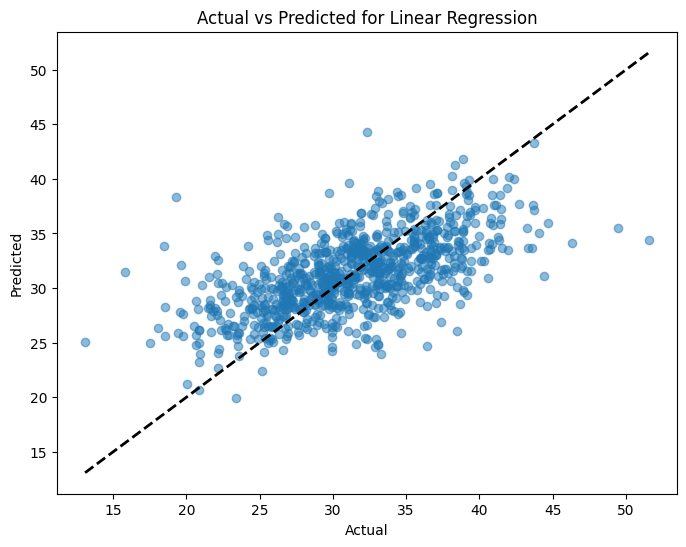

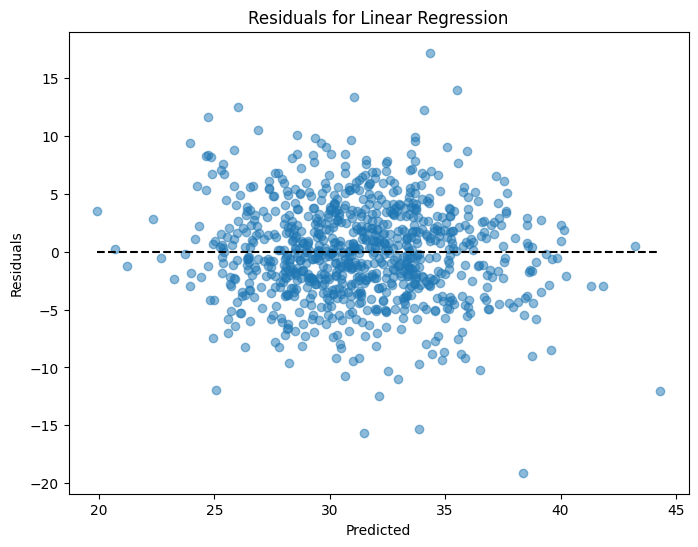

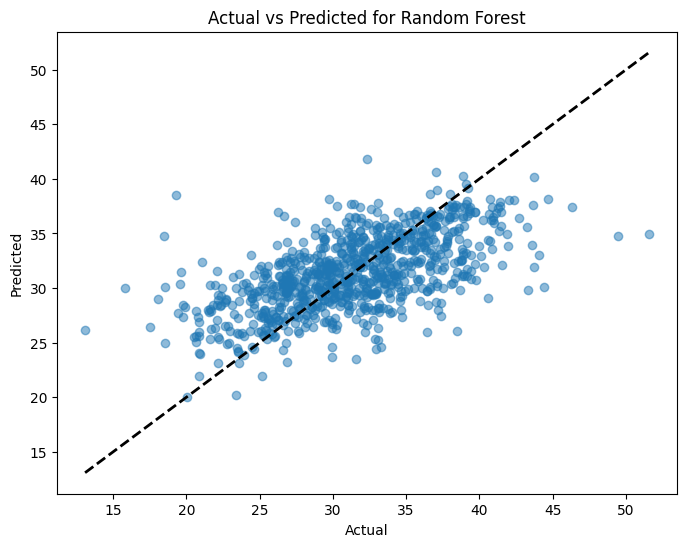

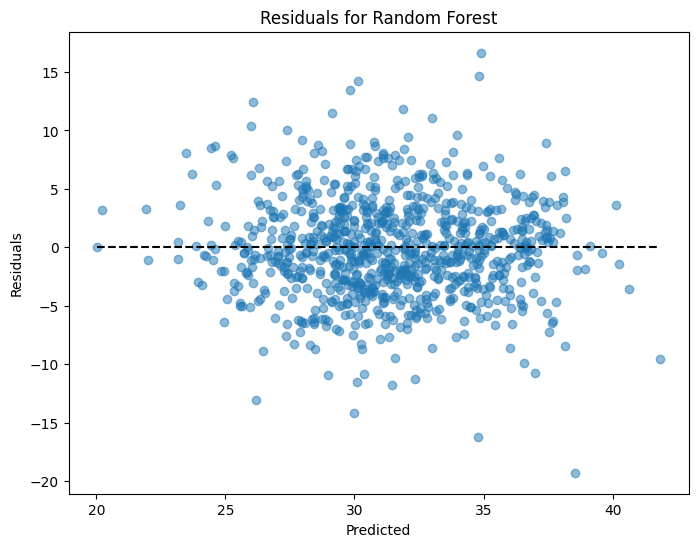

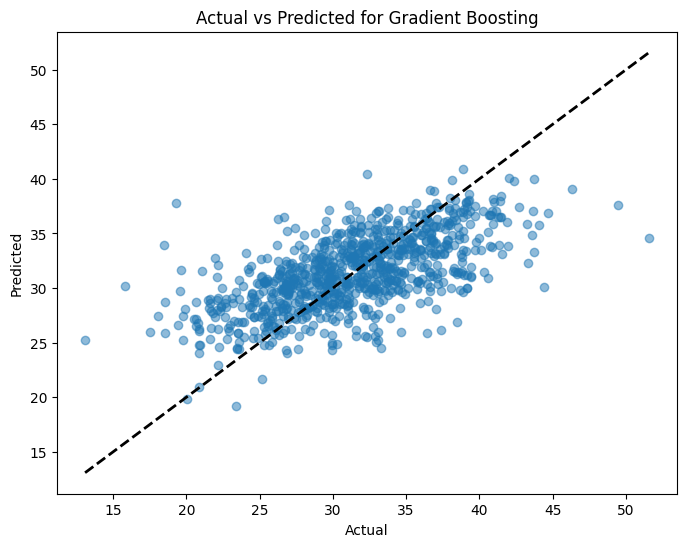

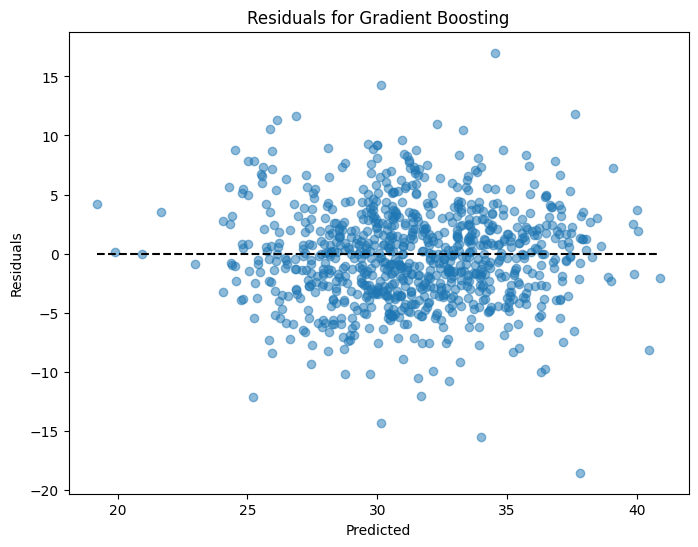

In [ ]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(Y_actual, Y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_actual, Y_pred, alpha=0.5)
    plt.plot([Y_actual.min(), Y_actual.max()], [Y_actual.min(), Y_actual.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

# Function to plot residuals
def plot_residuals(Y_actual, Y_pred, model_name):
    residuals = Y_actual - Y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='k', linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {model_name}')
    plt.show()

# Plot for each model
for model_name, Y_pred in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting'],
                              [Y_pred_lin_reg, Y_pred_rf, Y_pred_gb]):
    plot_actual_vs_predicted(Y_test, Y_pred, model_name)
    plot_residuals(Y_test, Y_pred, model_name)
